<a href="https://colab.research.google.com/github/26Kenn07/Pytorch/blob/main/Day_5_Baisc_Neural_Network_Pytroch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
#Create a Model Class that inherits nn.Module
class Model(nn.Module):
  #Input layer with 4 features ->
  #Hidden layer1 (HL1) (any number of neurons) ->
  #HL2 ->
  #Output layer (3 neurons) ->
  def __init__(self, in_features=4, h1=32, h2=16, out_features=3):
    super().__init__()#Instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    # x = F.softmax(self.out(x), dim=1) but PyTorch's nn.CrossEntropyLoss automatically applies the softmax operation internally to the network's output, so there's no need to apply softmax explicitly in the forward pass when you're using this loss function
    x = self.out(x)

    return x



In [3]:
#Pick a manual seed for randomization
torch.manual_seed(9)

#Create an instance of model

model = Model()

# Dataset

In [4]:
df = sns.load_dataset('iris')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df['species'] = LE.fit_transform(df['species'])

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Train & Test Split

In [8]:
X = df.drop(['species'], axis=1).values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
y = df['species'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Converting all numpy arrays into float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [12]:
#Set the criterion of the model to measure the error
#PyTorch's nn.CrossEntropyLoss automatically applies the softmax operation internally to the network's output, so there's no need to apply softmax explicitly in the forward pass when you're using this loss function
criterion = nn.CrossEntropyLoss()

#Choose an optimizer & setting a learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [13]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=3, bias=True)
)>

In [14]:
#Train our model
#Epochs (1 run through all the training data in our nn)
epochs = 200
losses = []

for i in range(epochs):
  #Get the predicted result
  y_hat = model.forward(X_train)

  #Measure the loss
  loss = criterion(y_hat, y_train)

  #Keep Track of our loss
  losses.append(loss.detach().numpy())

  #Print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  #Back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.2353183031082153
Epoch: 10 and loss: 1.0877628326416016
Epoch: 20 and loss: 1.028187870979309
Epoch: 30 and loss: 0.9882733821868896
Epoch: 40 and loss: 0.9426119923591614
Epoch: 50 and loss: 0.8929972052574158
Epoch: 60 and loss: 0.8380165696144104
Epoch: 70 and loss: 0.7784576416015625
Epoch: 80 and loss: 0.7172960638999939
Epoch: 90 and loss: 0.6610674262046814
Epoch: 100 and loss: 0.612235963344574
Epoch: 110 and loss: 0.570594072341919
Epoch: 120 and loss: 0.5346322655677795
Epoch: 130 and loss: 0.5029309391975403
Epoch: 140 and loss: 0.4728418290615082
Epoch: 150 and loss: 0.4444974362850189
Epoch: 160 and loss: 0.4166038930416107
Epoch: 170 and loss: 0.3886125385761261
Epoch: 180 and loss: 0.3603073060512543
Epoch: 190 and loss: 0.3316633999347687


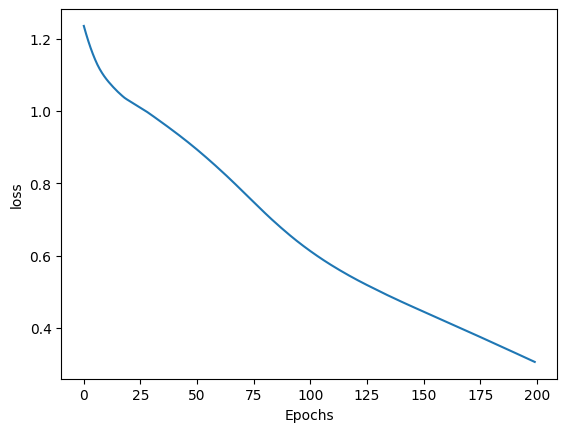

In [15]:
#Graph
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

In [16]:
#Evaluate the model on test data
with torch.no_grad(): #Turn off the back propogation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [17]:
loss

tensor(0.3090)

In [24]:
correct = 0

with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    #Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'Total Correct:', correct)

1.) tensor([-1.7443,  1.7422,  1.3459]) 	 1 	 1
2.) tensor([ 3.2555,  0.2970, -3.5618]) 	 0 	 0
3.) tensor([-4.9575,  2.1945,  4.6975]) 	 2 	 2
4.) tensor([-1.6427,  1.6560,  1.2605]) 	 1 	 1
5.) tensor([-2.0203,  1.9344,  1.5434]) 	 1 	 1
6.) tensor([ 2.9162,  0.3606, -3.2398]) 	 0 	 0
7.) tensor([-0.5010,  1.4163,  0.0879]) 	 1 	 1
8.) tensor([-2.6171,  1.8356,  2.2498]) 	 2 	 2
9.) tensor([-2.5262,  1.8104,  2.1208]) 	 1 	 2
10.) tensor([-1.0114,  1.6051,  0.5679]) 	 1 	 1
11.) tensor([-2.3038,  1.7581,  1.9551]) 	 2 	 2
12.) tensor([ 2.6824,  0.3307, -2.9822]) 	 0 	 0
13.) tensor([ 3.1722,  0.2475, -3.4743]) 	 0 	 0
14.) tensor([ 2.7305,  0.3437, -3.0319]) 	 0 	 0
15.) tensor([ 3.2023,  0.1936, -3.4592]) 	 0 	 0
16.) tensor([-1.3886,  1.6737,  1.0015]) 	 1 	 1
17.) tensor([-3.4161,  1.8035,  3.1796]) 	 2 	 2
18.) tensor([-1.2053,  1.5946,  0.7789]) 	 1 	 1
19.) tensor([-1.6130,  1.6048,  1.2585]) 	 1 	 1
20.) tensor([-3.4419,  1.7815,  3.2029]) 	 2 	 2
21.) tensor([ 2.7253,  0.3107

# Prediction On New Data

In [27]:
new_iris1 = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [28]:
with torch.no_grad():
  print(model(new_iris1))

tensor([ 2.8452,  0.2161, -3.1131])


In [29]:
new_iris2 = torch.tensor([5.0, 3.6, 1.4, 0.2])

In [32]:
with torch.no_grad():
  print(model(new_iris2))

tensor([ 3.1112,  0.1917, -3.3700])


# Save and load NN model

In [34]:
torch.save(model.state_dict(), 'my_first_nn_in_pytorch.pt')

In [35]:
#load model
new_model = Model()
new_model.load_state_dict(torch.load('my_first_nn_in_pytorch.pt'))

<All keys matched successfully>

In [36]:
#Loaded Correctly or not
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=3, bias=True)
)